In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/训练数据.csv')

In [4]:
data.reset_index(drop = True,inplace = True)
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU
0,2014-08-11,260.55,0.0,81.47,98.08,16569.98,1936.90,0.25,0.3,136.45,99.641198
1,2014-08-12,261.00,1.0,81.50,97.37,16560.54,1933.80,0.25,0.3,136.45,99.641198
2,2014-08-13,261.05,0.0,81.60,97.59,16651.80,1946.70,0.25,0.3,136.45,99.641198
3,2014-08-14,261.65,0.0,81.59,95.58,16713.58,1955.20,0.25,0.3,136.45,99.641198
4,2014-08-15,261.40,1.0,81.42,97.35,16662.91,1955.10,0.25,0.3,136.45,99.641198
...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,38703.27,5186.33,5.50,-0.1,137.93,219.498876
2431,2024-08-06,554.18,0.0,102.97,73.20,38997.66,5240.03,5.50,-0.1,137.93,219.498876
2432,2024-08-07,556.06,0.0,103.20,75.23,38763.45,5199.50,5.50,-0.1,137.93,219.498876
2433,2024-08-08,556.10,1.0,103.21,76.19,39446.49,5319.31,5.50,-0.1,137.93,219.498876


In [5]:
data['论坛情绪值0'] = data['论坛情绪值']
tag = 0 # 0为不改变，1为改变
states = data.loc[0,'论坛情绪值']   #首次状态值
for i in range(len(data)-1):
    if data.loc[i+1,'论坛情绪值'] != states:
        tag = tag + 1
        if tag == 3:
            states = data.loc[i+1,'论坛情绪值']
            tag = 0
        else:
            data.loc[i+1,'论坛情绪值'] = states
    else:
        tag = 0
        states = data.loc[i+1,'论坛情绪值']

In [6]:
data['黄金期货价格'] = data['黄金期货价格'].apply(np.log)
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU,论坛情绪值0
0,2014-08-11,5.562795,0.0,81.47,98.08,16569.98,1936.90,0.25,0.3,136.45,99.641198,0.0
1,2014-08-12,5.564520,0.0,81.50,97.37,16560.54,1933.80,0.25,0.3,136.45,99.641198,1.0
2,2014-08-13,5.564712,0.0,81.60,97.59,16651.80,1946.70,0.25,0.3,136.45,99.641198,0.0
3,2014-08-14,5.567008,0.0,81.59,95.58,16713.58,1955.20,0.25,0.3,136.45,99.641198,0.0
4,2014-08-15,5.566052,0.0,81.42,97.35,16662.91,1955.10,0.25,0.3,136.45,99.641198,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,6.327830,0.0,102.69,72.94,38703.27,5186.33,5.50,-0.1,137.93,219.498876,1.0
2431,2024-08-06,6.317490,0.0,102.97,73.20,38997.66,5240.03,5.50,-0.1,137.93,219.498876,0.0
2432,2024-08-07,6.320876,0.0,103.20,75.23,38763.45,5199.50,5.50,-0.1,137.93,219.498876,0.0
2433,2024-08-08,6.320948,0.0,103.21,76.19,39446.49,5319.31,5.50,-0.1,137.93,219.498876,1.0


In [7]:
x1 = []
y = []
for i in range(data.shape[0]-5):
    x1.append(data.loc[i:(i+4)][['黄金期货价格','论坛情绪值']].values)
    y.append(data.loc[i+5]['黄金期货价格'])

x1 = np.array(x1)
y = np.array(y)

In [8]:
x1 = x1.reshape(x1.shape[0],x1.shape[1]*x1.shape[2]) 
x1.shape

(2430, 10)

In [9]:
x1_train = x1[:1944]
y_train = y[:1944]

x1_test  = x1[1944:]
y_test  = y[1944:]

In [12]:
from xgboost import XGBRegressor
# 训练XGBoost模型
xgb = XGBRegressor()
clf = xgb.fit(x1_train, y_train)

In [13]:
pred = clf.predict(x1_test)

In [14]:
pred

array([5.957285 , 5.9611654, 5.962797 , 5.963575 , 5.969542 , 5.96957  ,
       5.972112 , 5.959875 , 5.9633827, 5.950973 , 5.968697 , 5.955817 ,
       5.957043 , 5.9627   , 5.9589286, 5.9631486, 5.9582467, 5.9472055,
       5.9433765, 5.97083  , 5.965604 , 5.9660726, 5.958103 , 5.9565434,
       5.9541006, 5.956747 , 5.9533195, 5.9572787, 5.9536357, 5.949549 ,
       5.9653172, 5.954269 , 5.9660335, 5.9538283, 5.951984 , 5.9485903,
       5.961762 , 5.968338 , 5.9733195, 5.969774 , 5.9773254, 5.9707437,
       5.9734855, 5.9694176, 5.9601164, 5.951945 , 5.956411 , 5.9594064,
       5.9608784, 5.9767838, 5.9775114, 5.9698663, 5.972795 , 5.967716 ,
       5.974114 , 5.9603977, 5.960025 , 5.9597664, 5.9724617, 5.9834685,
       5.9943542, 5.996229 , 5.9977846, 5.994624 , 6.003254 , 5.992    ,
       5.99427  , 6.0018787, 5.9997954, 6.0036244, 6.0003004, 5.9987726,
       5.997272 , 6.004169 , 5.9997954, 6.001268 , 6.001268 , 5.9990916,
       5.998294 , 5.997007 , 6.006726 , 6.004809 , 

In [15]:
df0 = pd.DataFrame(pred,columns=['pred'])
df = pd.DataFrame(y_test,columns=['truth'])
from sklearn import metrics

df = pd.concat([df, df0], axis=1)
MSE = metrics.mean_squared_error(np.exp(y_test), np.exp(pred))
RMSE = np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(pred)))
MAE = np.sqrt(metrics.mean_absolute_error(np.exp(y_test), np.exp(pred)))
MAPE = np.sqrt(metrics.mean_absolute_percentage_error(np.exp(y_test), np.exp(pred)))
print("MSE:",MSE)    
print("RMSE:",RMSE)
print("MAE:",MAE)  
print("MAPE:",MAPE)
df

MSE: 3490.9139046640375
RMSE: 59.083956406659475
MAE: 6.3528202746073745
MAPE: 0.2796586736935645


,truth,pred
0,5.969168,5.957285
1,5.965018,5.961165
2,5.969270,5.962797
3,5.971262,5.963575
4,5.970037,5.969542
...,...,...
481,6.327830,6.081054
482,6.317490,6.081054
483,6.320876,6.081054
484,6.320948,6.081054


In [16]:
df.to_csv('./data/XGBoost+修正论坛情绪值-预测值.csv',header=True,index=False)

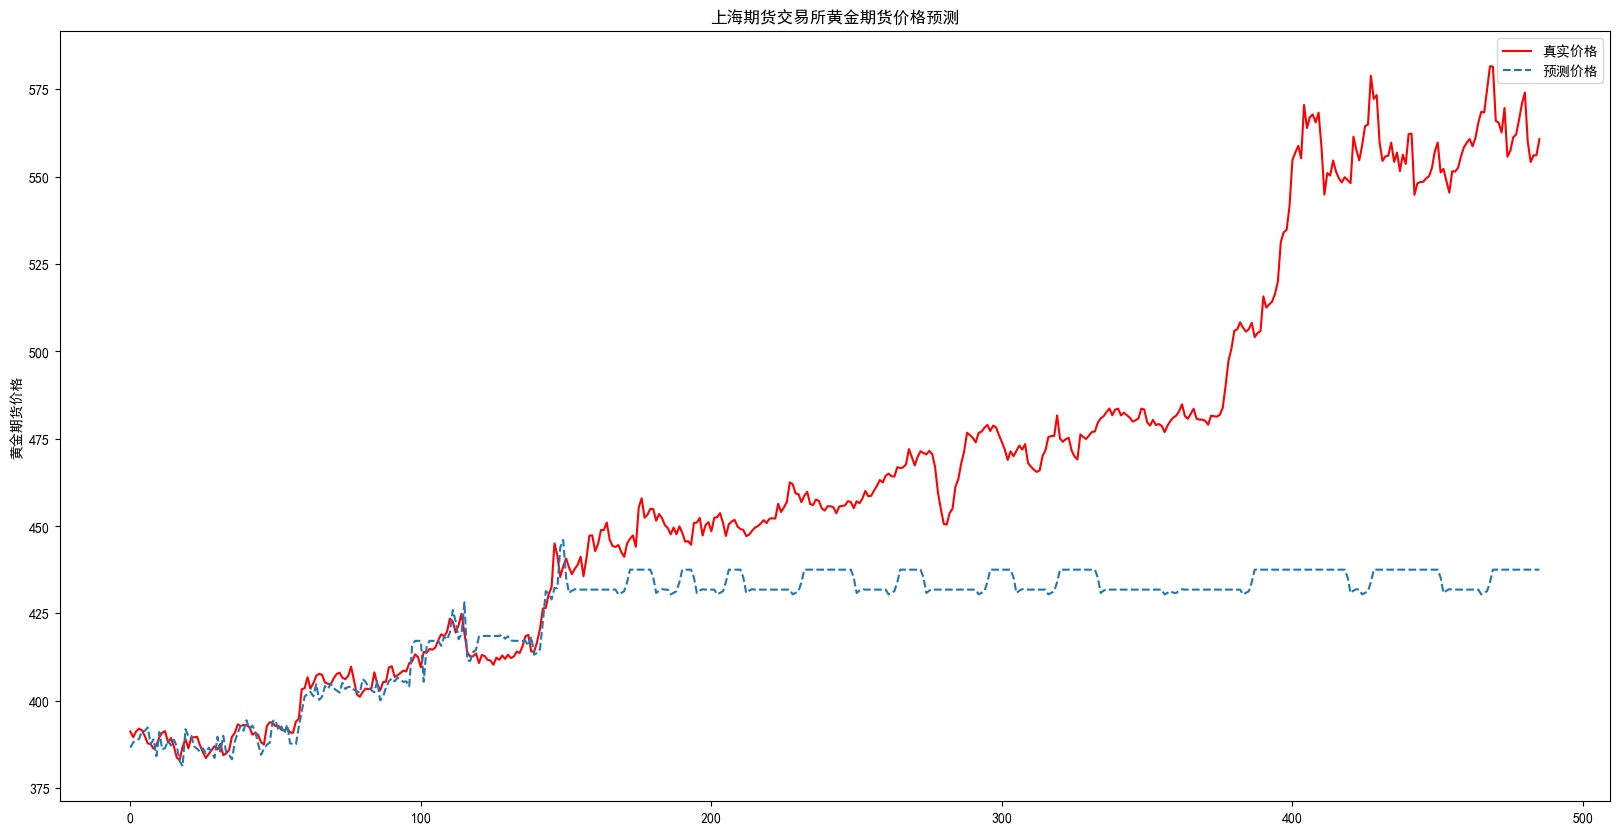

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示负号
plt.figure(figsize=(20,10))
plt.plot(np.exp(df.truth), 'r', label='真实价格')
plt.plot(np.exp(df.pred), '--', label='预测价格')
plt.title('上海期货交易所黄金期货价格预测')
plt.ylabel('黄金期货价格')
plt.legend()
plt.show()